# Part 1: Clustering

In [1]:
# Basic Setup

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, silhouette_score, davies_bouldin_score



## Clustering on Car Dataset

In [2]:
# Car Dataset Setup

cars_df = pd.read_csv("data/car_evaluation.csv", names = ["buying","maint", "doors", "persons", "lug_boot","safety","class"])
cars_df.head()
cleanup_nums = {"class":     {"unacc": 4, "acc": 3,'good': 2,'vgood':1}
                }
cars_df.replace(cleanup_nums,inplace = True)
target = cars_df['class']
print(target.value_counts())

cars_df.drop( ['class'],axis = 1,inplace = True)
cars_df_categorical = pd.get_dummies(cars_df)
cars_df_categorical.head()

X_train,X_test,Y_train,Y_test = train_test_split(cars_df_categorical, target, random_state=42)

print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))



4    1210
3     384
2      69
1      65
Name: class, dtype: int64
1296
1296
432
432


In [3]:
target.value_counts()

4    1210
3     384
2      69
1      65
Name: class, dtype: int64

In [4]:
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


### Kmeans

In [5]:
storage = {
    'silhouette_score': [],
    'inertia_score': [],
    'db_score': [],
}

cluster_range = np.arange(2, 30, 2)

for i in cluster_range:
    km_model = KMeans(n_clusters=i, random_state=42)
    storage['silhouette_score'].append(silhouette_score(X_train_std, km_model.fit_predict(X_train_std)))
    storage['inertia_score'].append(km_model.inertia_)
    storage['db_score'].append(davies_bouldin_score(X_train_std, km_model.fit_predict(X_train_std)))


/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harsh

No handles with labels found to put in legend.


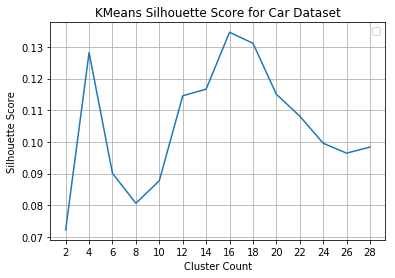

No handles with labels found to put in legend.


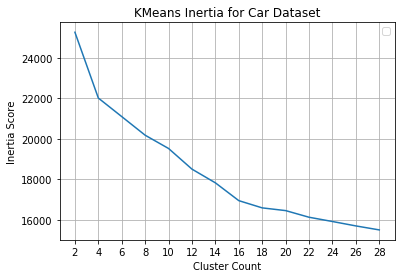

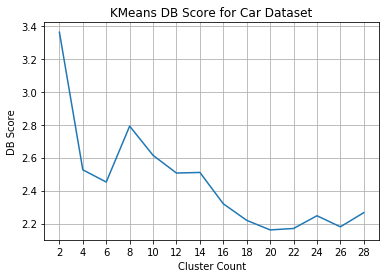

In [7]:
plt.figure()
plt.plot(cluster_range, storage['silhouette_score'])
plt.title('KMeans Silhouette Score for Car Dataset')
plt.ylabel('Silhouette Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(cluster_range, storage['inertia_score'])
plt.title('KMeans Inertia for Car Dataset')
plt.ylabel('Inertia Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(cluster_range, storage['db_score'])
plt.title('KMeans DB Score for Car Dataset')
plt.ylabel('DB Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

### Expectation Maximization

In [23]:
storage = {
    'silhouette_score': [],
    'aic_score': [],
    'bic_score': [],
    'db_score': [],
}

component_range = np.arange(2, 30, 2)

for i in component_range:
    em_model = GaussianMixture(n_components=i, random_state=42)
    em_model.fit(X_train_std)
    storage['bic_score'].append(em_model.bic(X_train_std))
    storage['aic_score'].append(em_model.aic(X_train_std))
    storage['silhouette_score'].append(silhouette_score(X_train_std, em_model.fit_predict(X_train_std)))
    storage['db_score'].append(davies_bouldin_score(X_train_std, em_model.fit_predict(X_train_std)))

    

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harsh

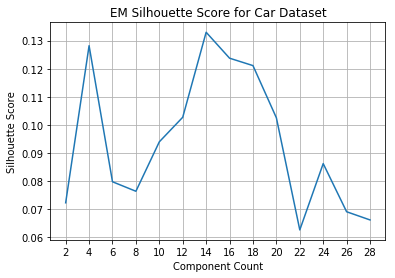

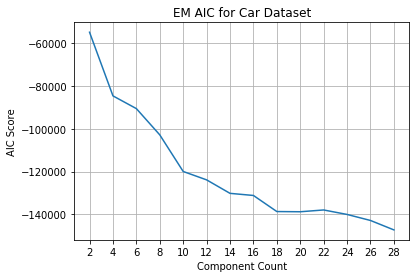

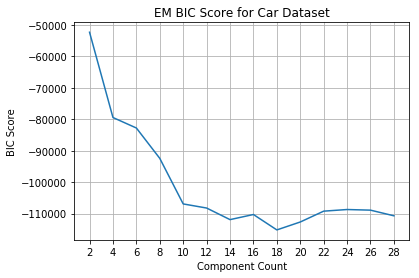

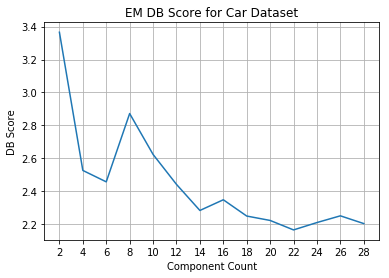

In [24]:
plt.figure()
plt.plot(Component_range, storage['silhouette_score'])
plt.title('EM Silhouette Score for Car Dataset')
plt.ylabel('Silhouette Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(Component_range, storage['aic_score'])
plt.title('EM AIC for Car Dataset')
plt.ylabel('AIC Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(Component_range, storage['bic_score'])
plt.title('EM BIC Score for Car Dataset')
plt.ylabel('BIC Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()


plt.figure()
plt.plot(cluster_range, storage['db_score'])
plt.title('EM DB Score for Car Dataset')
plt.ylabel('DB Score')
plt.xlabel('Component Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

## Clustering on Wine Dataset

In [25]:
wine_df = pd.read_csv("data/winequalityN.csv")
wine_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [26]:
cleanup_wines = {"type":     {"white": 0, "red": 1}
                }
wine_df.replace(cleanup_wines,inplace = True)
wine_df = wine_df.dropna()

In [27]:
target = wine_df['quality']
target[target < 6] = 0
target[target >= 6] = 1
print(len(target))
print(target.value_counts())
wine_df.drop(['quality'],axis = 1,inplace = True)
wine_df.head()

6463
1    4091
0    2372
Name: quality, dtype: int64


/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(wine_df, target, random_state=42)

In [30]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))
target.value_counts()

4847
4847
1616
1616


1    4091
0    2372
Name: quality, dtype: int64

In [31]:
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


### Kmeans

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harsh

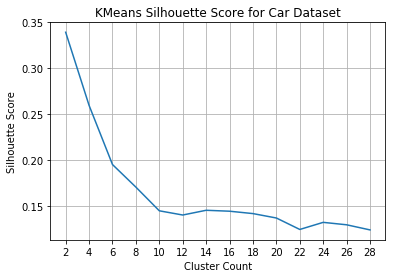

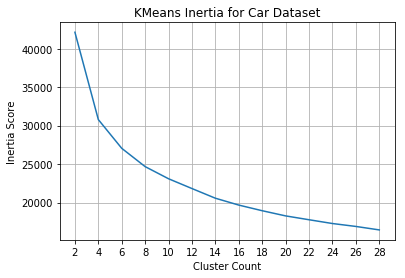

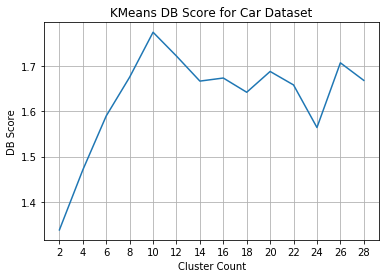

In [32]:
storage = {
    'silhouette_score': [],
    'inertia_score': [],
    'db_score': [],
}

cluster_range = np.arange(2, 30, 2)

for i in cluster_range:
    km_model = KMeans(n_clusters=i, random_state=42)
    storage['silhouette_score'].append(silhouette_score(X_train_std, km_model.fit_predict(X_train_std)))
    storage['inertia_score'].append(km_model.inertia_)
    storage['db_score'].append(davies_bouldin_score(X_train_std, km_model.fit_predict(X_train_std)))


plt.figure()
plt.plot(cluster_range, storage['silhouette_score'])
plt.title('KMeans Silhouette Score for Car Dataset')
plt.ylabel('Silhouette Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(cluster_range, storage['inertia_score'])
plt.title('KMeans Inertia for Car Dataset')
plt.ylabel('Inertia Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(cluster_range, storage['db_score'])
plt.title('KMeans DB Score for Car Dataset')
plt.ylabel('DB Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

### Expectation Maximiation

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harsh

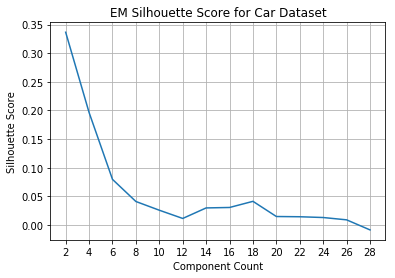

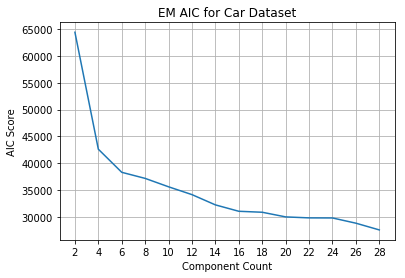

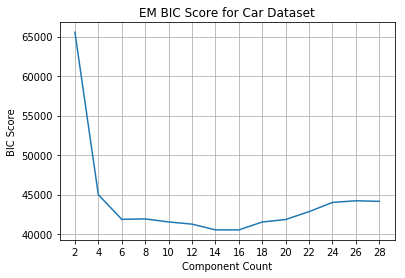

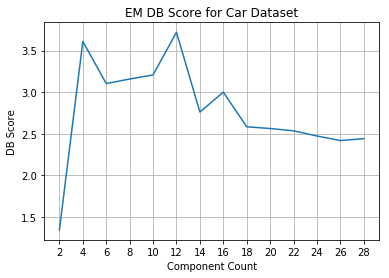

In [34]:
storage = {
    'silhouette_score': [],
    'aic_score': [],
    'bic_score': [],
    'db_score': [],
}

component_range = np.arange(2, 30, 2)

for i in component_range:
    em_model = GaussianMixture(n_components=i, random_state=42)
    em_model.fit(X_train_std)
    storage['bic_score'].append(em_model.bic(X_train_std))
    storage['aic_score'].append(em_model.aic(X_train_std))
    storage['silhouette_score'].append(silhouette_score(X_train_std, em_model.fit_predict(X_train_std)))
    storage['db_score'].append(davies_bouldin_score(X_train_std, em_model.fit_predict(X_train_std)))

    

plt.figure()
plt.plot(Component_range, storage['silhouette_score'])
plt.title('EM Silhouette Score for Car Dataset')
plt.ylabel('Silhouette Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(Component_range, storage['aic_score'])
plt.title('EM AIC for Car Dataset')
plt.ylabel('AIC Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(Component_range, storage['bic_score'])
plt.title('EM BIC Score for Car Dataset')
plt.ylabel('BIC Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()


plt.figure()
plt.plot(cluster_range, storage['db_score'])
plt.title('EM DB Score for Car Dataset')
plt.ylabel('DB Score')
plt.xlabel('Component Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()